In [1]:
# !pip install requests
# !pip install bs4
# !pip install pandas

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import spacy

In [2]:
toi_url = 'https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-madhya-pradesh-covid-19-tally-rises-to-20-five-test-positive-in-indore/liveblog/74820018.cms?curpg={}'

In [3]:
def get_toi_corona_live_updates(toi_url, no_of_pages_to_scrape):

    corona_news = []
    for i in range(no_of_pages_to_scrape):
        print('Scraping Data from URL: {}'.format(toi_url.format(i)))
        response = requests.get(toi_url.format(i))

        try:
            soup = BeautifulSoup(response.text,'html.parser')
            top_news_container = soup.find('div',class_ = '_3i7A1')
            for news_container in top_news_container.find_all('div',class_ = '_2tvI3'):
                news = {}
            #     news_time_tag = news_container.find('div',class_ = 'uu5Lm')
                news['datetime'] = news_container.span.text

                news_text = news_container.find('div',class_ = '_1KydD').get_text()
                news['text'] = news_text  #news_container.p.b.text
                corona_news.append(news)
                
        except:
            print('No more news at page {}'.format(i))
            break
    return corona_news

In [4]:
corona_news = get_toi_corona_live_updates( toi_url= toi_url , no_of_pages_to_scrape= 20 )

Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-madhya-pradesh-covid-19-tally-rises-to-20-five-test-positive-in-indore/liveblog/74820018.cms?curpg=0
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-madhya-pradesh-covid-19-tally-rises-to-20-five-test-positive-in-indore/liveblog/74820018.cms?curpg=1
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-madhya-pradesh-covid-19-tally-rises-to-20-five-test-positive-in-indore/liveblog/74820018.cms?curpg=2
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-madhya-pradesh-covid-19-tally-rises-to-20-five-test-positive-in-indore/liveblog/74820018.cms?curpg=3
Scraping Data from URL: https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-madhya-pradesh-covid-19-tally-rises-to-20-five-test-positive-in-indore/liveblog/74820018.cms?curpg=4
Scraping D

In [5]:
df = pd.DataFrame(corona_news)

In [6]:
df.head()

,datetime,text
0,"12:44 (IST), Mar 26",Two wheeler being seized by police on Anna Sal...
1,"12:42 (IST), Mar 26",During lockdown there will be no restrictions ...
2,"12:41 (IST), Mar 26",Spoke to SDMC Commissioner&suggested to him th...
3,"12:40 (IST), Mar 26",All officers of Gurugram Police have been dire...
4,"12:39 (IST), Mar 26",Gautam Budh Nagar District Magistrate BN Singh...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
datetime    101 non-null object
text        101 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [8]:
nlp = spacy.load('en_core_web_sm')

In [10]:
# for news in df.text:
#     print('NEWS : {}'.format(news))
#     for ent in nlp(news).ents:
#         print('\t Text : {} , Entities : {}'.format(ent.text ,ent.label_))

In [9]:
entities = []
for news in df.text:
    entity = []
#     print('NEWS : {}'.format(news))
    entity = [(ent.text) for ent in nlp(news).ents]
#     for ent in nlp(news).ents:
#         entity['text'] = ent.text
#         entity['label'] = ent.label_
    entities.append(entity)

In [10]:
from pandas.core.common import flatten

words = list(flatten(entities))

In [13]:
# !pip install wordcloud
# !pip install matplotlib

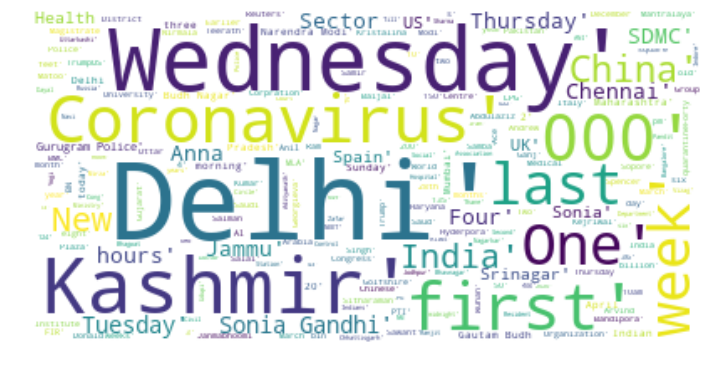

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


wordcloud = WordCloud(background_color = 'white').generate(str(entities))
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [12]:
economic_times_url = 'https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-cases-in-india-live-news-latest-updates-march26/liveblog/74820249.cms'

In [13]:
response = requests.get(economic_times_url)
soup = BeautifulSoup(response.text,'html.parser')
top_news_container = soup.find('div',class_ = 'pageliveblog')

In [14]:
econ_times_corona_news = []
for news_container in top_news_container.find_all('div',class_ = 'updateText'):
    news = {}
    news_time_tag = news_container.find('div',class_ = 'shareTime')
    time = news_time_tag.find('div',class_ = 'timeStamp').text.replace('\n','')
    #     news['datetime'] = time.text
    news['datetime'] = time
    try:
        headline = news_container.find('h3').text.replace('\n','')
    except:
        headline = ' '
        continue
    try:   
        text = news_container.find('div',class_ = 'blogSysn').text.replace('\n','')
    except:
        text = ' '
        
    news['text'] = headline + ' ' + text
    
    econ_times_corona_news.append(news)

In [15]:
df_economic_times  = pd.DataFrame(econ_times_corona_news)

In [16]:
df_economic_times.head()

,datetime,text
0,12:45 PM,"Two more Covid-19 cases reported in Bihar, tak..."
1,12:42 PM,COVID-19: Noida Authority allows home delivery...
2,12:40 PM,Coronavirus: Steel players consider to cut pro...
3,12:35 PM,"Food home delivery services have been allowed,..."
4,12:34 PM,Retail sales suspended at Mangaluru central ma...


In [17]:
df_economic_times.tail()

,datetime,text
54,10:39 AM,Total number of COVID19 positive cases rise to...
55,10:38 AM,'New portable COVID-19 test can give results i...
56,10:30 AM,Test report of woman who died on Mar 24 tested...
57,10:28 AM,NBT offers free download of books to encourage...
58,10:27 AM,"In Ahmedabad, the district administration and ..."


In [21]:
!pip install selenium

In [28]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome(executable_path='C:/chrome_driver/chromedriver.exe')


In [29]:
import time

# driver.get("https://www.cnbctv18.com/healthcare/coronavirus-india-live-updates-coronavirus-live-news-updates-coronavirus-covid-19-pune-maharashtra-mumbai-delhi-noida-uttar-pradesh-bengaluru-gurgaon-coronavirus-cases-in-india-5512961.htm")
# driver.get('https://www.cnbctv18.com/politics/coronavirus-live-coronavirus-live-updates-coronavirus-in-india-latest-news-updates-live-news-coronavirus-blog-covid-19-live-news-covid-19-india-news-mumbai-delhi-pune-nagpur-uttar-pradesh-gurgaon-5530481.htm')
# driver.get('https://www.cnbctv18.com/healthcare/coronavirus-live-updates-live-coronavirus-news-coronavirus-in-india-coronavirus-lockdown-curfew-delhi-maharashtra-kerala-uttar-pradesh-noida-gurugaon-pune-death-toll-covid-19-news-5542551.htm')
driver.get('https://www.cnbctv18.com/healthcare/coronavirus-covid-19-coronavirus-in-india-coronavirus-live-updates-coronavirus-live-blog-coronavirus-pandemic-coronavirus-lockdown-maharashtra-delhi-uttar-pradesh-bengaluru-pune-bhilwara-5559811.htm')
try:
    more_buttons = driver.find_element_by_link_text('View More')
    for x in range(7):
      if more_buttons.is_displayed():
          driver.execute_script("arguments[0].click();", more_buttons)
          time.sleep(7)
except:
    pass

In [30]:
page_source = driver.page_source

In [31]:
soup_cnbc = BeautifulSoup(page_source,'lxml')
top_news_container = soup_cnbc.find_all('div',class_ = 'live-blog-row blog-border-red share-post')

In [32]:
cnbc_corona_news = []
for each_news in top_news_container:
    cnbc_news = {}
    
    try:
        cnbc_news['datetime'] = each_news.find('div',class_ = 'date-n-time').get_text().replace('\n','')
        cnbc_news['text'] = each_news.find('div',class_= 'copy').get_text().replace('\n','')
    except:
        continue
    cnbc_corona_news.append(cnbc_news)

In [33]:
top_news_container_2 = soup_cnbc.find_all('div',class_ = 'live-blog-row blog-border-red')
for each_news in top_news_container_2:
    cnbc_news = {}
    
    try:
        cnbc_news['datetime'] = each_news.find('div',class_ = 'date-n-time').get_text().replace('\n','')
        cnbc_news['text'] = each_news.find('div',class_= 'copy').get_text().replace('\n','')
    except:
        continue
    cnbc_corona_news.append(cnbc_news)

In [34]:
df_cnbc  = pd.DataFrame(cnbc_corona_news)

In [35]:
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
datetime    37 non-null object
text        37 non-null object
dtypes: object(2)
memory usage: 672.0+ bytes


In [36]:
df_all_news_scraped = pd.concat([df,df_economic_times,df_cnbc],ignore_index=True)

In [37]:
df_all_news_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
datetime    197 non-null object
text        197 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [39]:
df_all_news_scraped.to_csv('../Data/corona_news_scraped_on_26th_march.csv',index = False)